regression
### Question-23
Use 
sklearn.datasets.load_breast_cancer
And Yellowbrick
Show confusion matrix and ROCAUC 
using Logistic regression 


#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
#check wdbc.data or check  breast_cancer.csv , but use load_breast_cancer() 
#Diagnosis (M = malignant,1, B = benign,0) 
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)Ten real-valued features are computed for each cell nucleus:
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)


In [1]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import * 
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data
type(data) 
data.keys()

#Bunch :  A Bunch is just a simple container object used by scikit-learn that acts like a Python dictionary, but you can also access its keys as attributes.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Data-Bunch

data: A NumPy array of shape (569, 30) containing the feature values.

target: A NumPy array of shape (569,) with class labels (0 = malignant, 1 = benign).

frame: A pandas DataFrame containing the full dataset (features + target), or None if not applicable.

target_names: An array of the class names (['malignant', 'benign']).

DESCR: A detailed text description of the dataset and its attributes.

feature_names: An array of the names of the 30 features.

filename: The path to the location of the CSV file on disk (if downloaded).

data_module: The module where the dataset loader is defined (e.g., 'sklearn.datasets').

In [4]:
data.data,data.data.shape

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 (569, 30))

In [5]:
data.target,data.target_names,data.target.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [6]:
# An array of the names of the 30 features
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
#A detailed text description of the dataset and its attributes.
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [8]:
type(data.data)

numpy.ndarray

In [9]:
#Loading the data into X -> Input and y -> Output
X = data.data
y = data.target

In [10]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
#preprocessing - Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape,X

((569, 30),
 array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
          2.75062224,  1.93701461],
        [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
         -0.24388967,  0.28118999],
        [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
          1.152255  ,  0.20139121],
        ...,
        [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
         -1.10454895, -0.31840916],
        [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
          1.91908301,  2.21963528],
        [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
         -0.04813821, -0.75120669]]))

In [12]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
X_train.size,X_test.size

(15360, 1710)

In [13]:
#Model - Logistic Regression
cancer_model = LogisticRegression()

In [14]:
#fitting the model with traning data
cancer_model.fit(X_train,y_train)

LogisticRegression()

In [15]:
cancer_model.coef_,cancer_model.intercept_

(array([[-0.36974876, -0.30795751, -0.35602122, -0.4341002 , -0.12560398,
          0.57903403, -0.81627686, -0.87754314, -0.01749327,  0.30146489,
         -1.31742539,  0.21814011, -0.70812483, -0.99035326, -0.25982912,
          0.5968199 ,  0.09963419, -0.28238129,  0.35936747,  0.69549232,
         -1.00226544, -1.26027355, -0.81937394, -0.96560455, -0.61125115,
          0.05894557, -0.86003361, -0.87997291, -0.83878557, -0.48354596]]),
 array([0.12407897]))

In [17]:
features = list(data.feature_names)
type(features)
weights = list(zip(features,cancer_model.coef_[0]))
weights

[('mean radius', -0.36974875550741637),
 ('mean texture', -0.3079575149746524),
 ('mean perimeter', -0.3560212216735793),
 ('mean area', -0.434100201064278),
 ('mean smoothness', -0.1256039801680416),
 ('mean compactness', 0.5790340299468161),
 ('mean concavity', -0.8162768615236883),
 ('mean concave points', -0.8775431355524079),
 ('mean symmetry', -0.017493274054316978),
 ('mean fractal dimension', 0.30146489374291946),
 ('radius error', -1.3174253902746815),
 ('texture error', 0.2181401117403351),
 ('perimeter error', -0.7081248293319464),
 ('area error', -0.990353258471712),
 ('smoothness error', -0.2598291158770301),
 ('compactness error', 0.5968199011995058),
 ('concavity error', 0.09963418650350218),
 ('concave points error', -0.2823812948242982),
 ('symmetry error', 0.3593674678049401),
 ('fractal dimension error', 0.6954923181436011),
 ('worst radius', -1.0022654442293124),
 ('worst texture', -1.2602735465517596),
 ('worst perimeter', -0.8193739365027185),
 ('worst area', -0.9

In [18]:
#Training score - Bias
cancer_model.score(X_train,y_train)

0.986328125

In [19]:
#Testing Score - variance
cancer_model.score(X_test,y_test)

1.0

In [24]:
#Training - Confusion_Matrix
y_train_pred = cancer_model.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[185,   5],
       [  2, 320]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


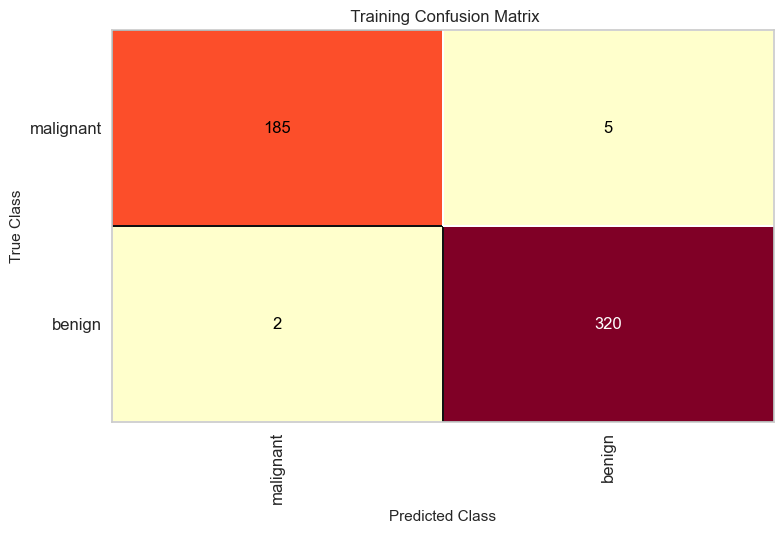

<Axes: title={'center': ' Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
cm = ConfusionMatrix(cancer_model, classes=data.target_names,title=" Training Confusion Matrix")
cm.score(X_train, y_train)
cm.show()

In [21]:
#Testing - Confusion_Matrix
yHat = cancer_model.predict(X_test)
confusion_matrix(y_test,yHat)

array([[22,  0],
       [ 0, 35]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


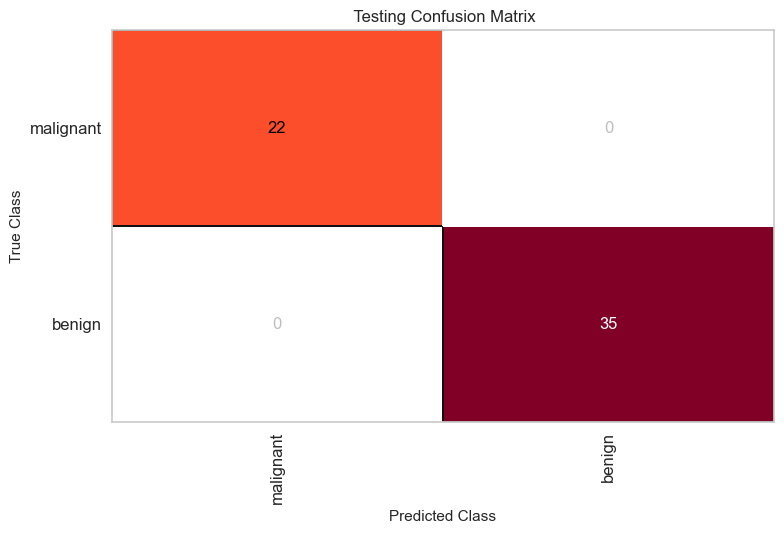

<Axes: title={'center': ' Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [30]:
cm = ConfusionMatrix(cancer_model, classes=data.target_names,title=" Testing Confusion Matrix")
cm.score(X_test, y_test)
cm.show()

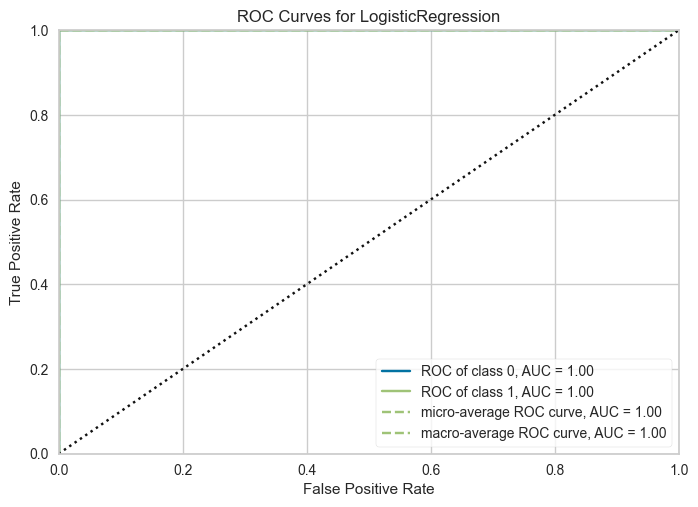

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [22]:
#Area Under the Curve
roc = ROCAUC(LogisticRegression())
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()